In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Telegram Desktop\\cleaned_ipl_dataset_2008_to_2023.csv")


In [3]:
df.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Left Handed Bat,LHB,1,1,1,1,1,1,1,0,1,PP
1,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,0,2,PP
2,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,0,1,1,1,1,0,0,0,3,PP
3,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,0,4,PP
4,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,0,5,PP


In [4]:
df.dtypes

match_id                      int64
season                        int64
start_date                   object
venue                        object
innings                       int64
ball                        float64
batting_team                 object
bowling_team                 object
striker                      object
non_striker                  object
bowler                       object
runs_off_bat                  int64
extras                        int64
wides                       float64
noballs                     float64
byes                        float64
legbyes                     float64
penalty                     float64
wicket_type                  object
player_dismissed             object
other_wicket_type           float64
other_player_dismissed      float64
bowl_style                   object
bowling_style                object
bat_style                    object
batting_style                object
wides_cnt_balls               int64
noballs_cnt_balls           

In [5]:
df['start_date'] = pd.to_datetime(df['start_date'])

In [6]:
df.dtypes

match_id                             int64
season                               int64
start_date                  datetime64[ns]
venue                               object
innings                              int64
ball                               float64
batting_team                        object
bowling_team                        object
striker                             object
non_striker                         object
bowler                              object
runs_off_bat                         int64
extras                               int64
wides                              float64
noballs                            float64
byes                               float64
legbyes                            float64
penalty                            float64
wicket_type                         object
player_dismissed                    object
other_wicket_type                  float64
other_player_dismissed             float64
bowl_style                          object
bowling_sty

In [7]:
    df['six'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)
    df['four'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['three'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['two'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['one'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['dots'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)


In [8]:
df.tail(50)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase,six,four,three,two,one,dots
243604,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,6.7,Chennai Super Kings,Gujarat Titans,DP Conway,S Dube,Noor Ahmad,0,0,NaN,NaN,NaN,NaN,NaN,caught,DP Conway,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,6,7,MO,0,0,0,0,0,1
243605,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,7.1,Chennai Super Kings,Gujarat Titans,S Dube,AM Rahane,J Little,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left Handed Bat,LHB,1,1,1,1,1,1,1,7,1,MO,0,0,0,0,1,0
243606,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,7.2,Chennai Super Kings,Gujarat Titans,AM Rahane,S Dube,J Little,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,7,2,MO,0,0,0,1,0,0
243607,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,7.3,Chennai Super Kings,Gujarat Titans,AM Rahane,S Dube,J Little,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,7,3,MO,1,0,0,0,0,0
243608,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,7.4,Chennai Super Kings,Gujarat Titans,AM Rahane,S Dube,J Little,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,7,4,MO,0,0,0,0,0,1
243609,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,7.5,Chennai Super Kings,Gujarat Titans,AM Rahane,S Dube,J Little,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,7,5,MO,1,0,0,0,0,0
243610,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,7.6,Chennai Super Kings,Gujarat Titans,AM Rahane,S Dube,J Little,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,7,6,MO,0,0,0,0,1,0
243611,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,8.1,Chennai Super Kings,Gujarat Titans,AM Rahane,S Dube,Noor Ahmad,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right Handed Bat,RHB,0,1,1,1,1,0,0,8,1,MO,0,0,0,0,0,1
243612,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,8.2,Chennai Super Kings,Gujarat Titans,AM Rahane,S Dube,Noor Ahmad,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,8,2,MO,0,0,0,0,1,0
243613,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,8.3,Chennai Super Kings,Gujarat Titans,S Dube,AM Rahane,Noor Ahmad,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left Handed Bat,LHB,1,1,1,1,1,1,1,8,3,MO,0,0,0,0,1,0


In [9]:
len(df),len(df.columns)

(243654, 42)

In [10]:
# from year to year matches placed by MSD
dhoni = df[(df.start_date >= '2008-04-18') & (df.start_date <= '2023-05-29')]




In [11]:
dhoni.tail(50)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase,six,four,three,two,one,dots
243604,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,6.7,Chennai Super Kings,Gujarat Titans,DP Conway,S Dube,Noor Ahmad,0,0,NaN,NaN,NaN,NaN,NaN,caught,DP Conway,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,6,7,MO,0,0,0,0,0,1
243605,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,7.1,Chennai Super Kings,Gujarat Titans,S Dube,AM Rahane,J Little,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left Handed Bat,LHB,1,1,1,1,1,1,1,7,1,MO,0,0,0,0,1,0
243606,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,7.2,Chennai Super Kings,Gujarat Titans,AM Rahane,S Dube,J Little,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,7,2,MO,0,0,0,1,0,0
243607,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,7.3,Chennai Super Kings,Gujarat Titans,AM Rahane,S Dube,J Little,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,7,3,MO,1,0,0,0,0,0
243608,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,7.4,Chennai Super Kings,Gujarat Titans,AM Rahane,S Dube,J Little,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,7,4,MO,0,0,0,0,0,1
243609,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,7.5,Chennai Super Kings,Gujarat Titans,AM Rahane,S Dube,J Little,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,7,5,MO,1,0,0,0,0,0
243610,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,7.6,Chennai Super Kings,Gujarat Titans,AM Rahane,S Dube,J Little,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,7,6,MO,0,0,0,0,1,0
243611,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,8.1,Chennai Super Kings,Gujarat Titans,AM Rahane,S Dube,Noor Ahmad,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right Handed Bat,RHB,0,1,1,1,1,0,0,8,1,MO,0,0,0,0,0,1
243612,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,8.2,Chennai Super Kings,Gujarat Titans,AM Rahane,S Dube,Noor Ahmad,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right Handed Bat,RHB,1,1,1,1,1,1,1,8,2,MO,0,0,0,0,1,0
243613,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,8.3,Chennai Super Kings,Gujarat Titans,S Dube,AM Rahane,Noor Ahmad,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left Handed Bat,LHB,1,1,1,1,1,1,1,8,3,MO,0,0,0,0,1,0


In [12]:
#lets count MSD 
#runs
#SR
# % of runs for csk by MSD
msd = dhoni[dhoni['striker'] == 'MS Dhoni']

In [13]:
msd.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase,six,four,three,two,one,dots
265,335983,2008,2008-04-19,Punjab Cricket Association IS Bindra Stadium,1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,6,3,MO,0,0,0,0,1,0


In [14]:
sum(msd['runs_off_bat'])

5082

In [15]:
len(msd)

3865

In [16]:
100*sum(msd['runs_off_bat'])/len(msd)

131.48771021992238

In [17]:
sum(dhoni[dhoni.batting_team == 'Chennai Super Kings']['runs_off_bat'])


34325

In [18]:
100*sum(msd['runs_off_bat'])/sum(dhoni[dhoni.batting_team == 'Chennai Super Kings']['runs_off_bat'])


14.805535324107794

In [19]:
100*5082/34325

14.805535324107794

In [54]:
pd.DataFrame(dhoni.groupby(['striker'])['six'].sum()).sort_values(by = 'six', ascending = False).reset_index().head(10)

,striker,six
0,MS Dhoni,183
1,KA Pollard,144
2,AB de Villiers,140
3,AD Russell,107
4,RG Sharma,90
5,V Kohli,83
6,HH Pandya,83
7,KD Karthik,79
8,DA Miller,74
9,RA Jadeja,68


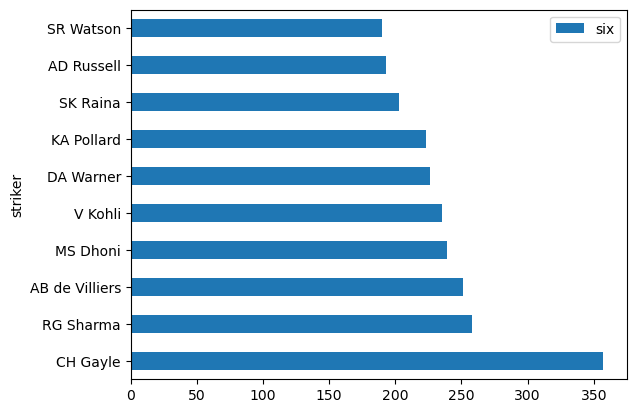

In [20]:
# max six hitter in ipl
plot_data = pd.DataFrame(dhoni.groupby(['striker'])['six'].sum()).sort_values(by = 'six', ascending = False).reset_index().head(10).plot(kind = 'barh', x='striker', y='six')

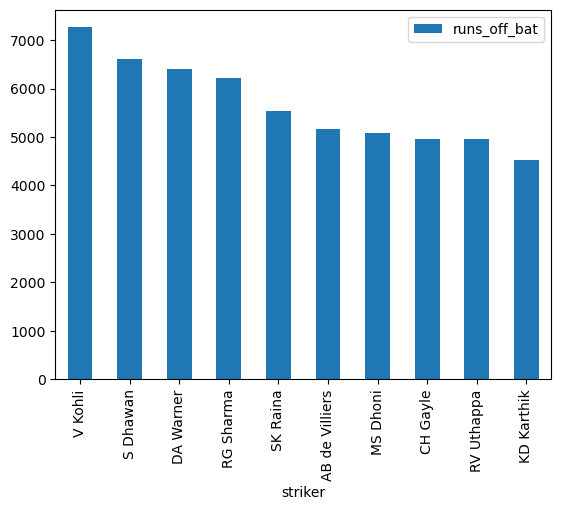

In [21]:
# top scores in ipl 
plot_data = pd.DataFrame(dhoni.groupby(['striker'])['runs_off_bat'].sum()).sort_values(by = 'runs_off_bat', ascending = False).reset_index().head(10).plot(kind = 'bar', x='striker', y='runs_off_bat')

In [22]:
#runs by MSD in acc.to season
msd.groupby(['season'])['runs_off_bat'].sum()

season
2008    414
2009    332
2010    287
2011    392
2012    358
2013    461
2014    371
2015    372
2016    284
2017    290
2018    455
2019    416
2020    200
2021    114
2022    232
2023    104
Name: runs_off_bat, dtype: int64

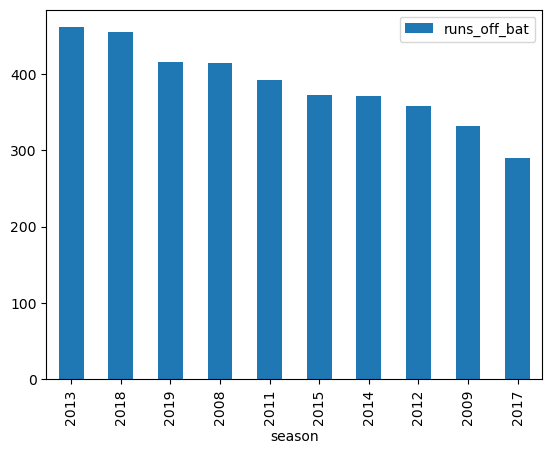

In [23]:
plot_data = pd.DataFrame(msd.groupby(['season'])['runs_off_bat'].sum()).sort_values(by = 'runs_off_bat', ascending = False).reset_index().head(10).plot(kind = 'bar', x='season', y='runs_off_bat')

In [24]:
dhoni.tail(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase,six,four,three,two,one,dots
243644,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,13.3,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,Mohammed Shami,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Left Handed Bat,LHB,1,1,1,1,1,1,1,13,3,MO,0,0,0,1,0,0
243645,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,13.4,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,Mohammed Shami,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Left Handed Bat,LHB,1,1,1,1,1,1,1,13,4,MO,0,0,0,1,0,0
243646,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,13.5,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,Mohammed Shami,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Left Handed Bat,LHB,1,1,1,1,1,1,1,13,5,MO,0,0,0,0,1,0
243647,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,13.6,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,Mohammed Shami,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Left Handed Bat,LHB,1,1,1,1,1,1,1,13,6,MO,0,0,0,1,0,0
243648,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.1,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left Handed Bat,LHB,1,1,1,1,1,1,1,14,1,MO,0,0,0,0,0,1
243649,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.2,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left Handed Bat,LHB,1,1,1,1,1,1,1,14,2,MO,0,0,0,0,1,0
243650,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.3,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left Handed Bat,LHB,1,1,1,1,1,1,1,14,3,MO,0,0,0,0,1,0
243651,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.4,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left Handed Bat,LHB,1,1,1,1,1,1,1,14,4,MO,0,0,0,0,1,0
243652,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.5,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left Handed Bat,LHB,1,1,1,1,1,1,1,14,5,MO,1,0,0,0,0,0
243653,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.6,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left Handed Bat,LHB,1,1,1,1,1,1,1,14,6,MO,0,1,0,0,0,0


In [25]:
#lets count death overs runs by batsman
dhoni = dhoni[(dhoni['over_no'] >= 15) & (dhoni['over_no'] <= 20)]


In [26]:
dhoni.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase,six,four,three,two,one,dots
94,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,15.1,Kolkata Knight Riders,Royal Challengers Bangalore,DJ Hussey,BB McCullum,AA Noffke,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,15,1,MO,0,0,0,0,0,1
95,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,15.2,Kolkata Knight Riders,Royal Challengers Bangalore,DJ Hussey,BB McCullum,AA Noffke,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,15,2,MO,0,0,0,0,1,0
96,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,15.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,DJ Hussey,AA Noffke,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,15,3,MO,0,0,0,1,0,0
97,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,15.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,DJ Hussey,AA Noffke,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,15,4,MO,0,0,0,0,0,1
98,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,15.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,DJ Hussey,AA Noffke,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,15,5,MO,0,0,0,0,1,0


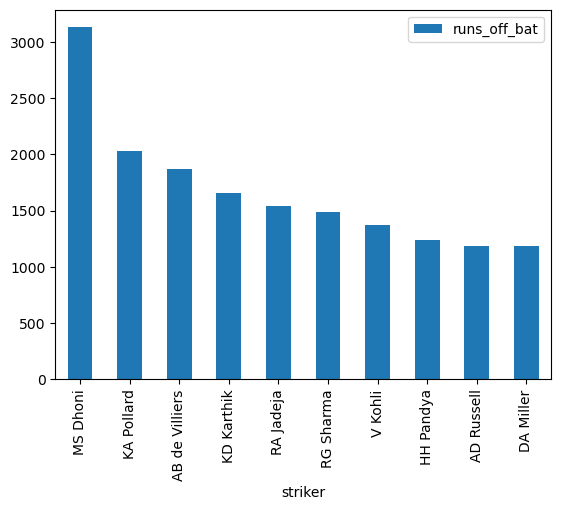

In [52]:
#graph presentation of runs by batsman in death overs
plot = pd.DataFrame(dhoni.groupby(['striker'])['runs_off_bat'].sum()).sort_values(by='runs_off_bat', ascending=False).reset_index().head(10).plot(kind='bar', x='striker', y='runs_off_bat')


In [37]:
#top runs hit by batters in death overs
pd.DataFrame(dhoni.groupby(['striker'])['runs_off_bat'].sum()).sort_values(by = 'runs_off_bat', ascending = False).reset_index().head(10)

,striker,runs_off_bat
0,MS Dhoni,3131
1,KA Pollard,2032
2,AB de Villiers,1868
3,KD Karthik,1655
4,RA Jadeja,1539
5,RG Sharma,1485
6,V Kohli,1372
7,HH Pandya,1240
8,AD Russell,1189
9,DA Miller,1188


In [28]:
#sixes hit by MSD in death overs
pd.DataFrame(dhoni.groupby(['striker'])['six'].sum()).sort_values(by = 'six', ascending = False).reset_index().head(10)

,striker,six
0,MS Dhoni,183
1,KA Pollard,144
2,AB de Villiers,140
3,AD Russell,107
4,RG Sharma,90
5,V Kohli,83
6,HH Pandya,83
7,KD Karthik,79
8,DA Miller,74
9,RA Jadeja,68


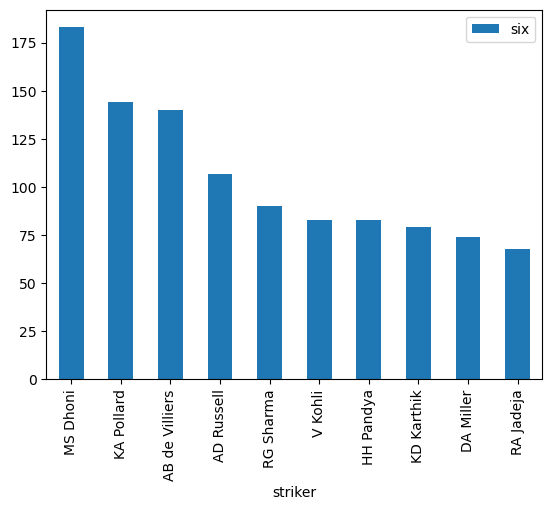

In [51]:
#sixes hit by MSD in death overs
plot = pd.DataFrame(dhoni.groupby(['striker'])['six'].sum()).sort_values(by='six', ascending=False).reset_index().head(10).plot(kind='bar', x='striker', y='six')


In [40]:
#overall score by batsman in death overs
sum(dhoni['runs_off_bat'])

82551

In [41]:
len(dhoni)

55539

In [42]:
822551/55539

14.810331478780677

In [45]:
#count of SR in death overs
msd = msd[(msd['over_no'] >= 15) & (msd['over_no'] <= 20)]


In [47]:
sum(msd['runs_off_bat'])

3131

In [48]:
len(msd)

1876

In [50]:
#SR at death overs
100*3131/1876

166.89765458422175

In [53]:
# MSD DATA
# RUNS = 5082
# SR = 131 overall career
# % of runs contribution = 14%
# SR at death = 166 career SR
# RUNS at DEATh = 3131 
# SIXES = 183
# MSD know as world best finisher in his 15 years of journey mainting the strikerate of 131 and 166 in death 183 sixes in death the reputation and records says that he is still good enough to bat if he is fit enough to play.